In [6]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

import helper_functions as hf

from sklearn.preprocessing import StandardScaler, scale, MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_validate, GridSearchCV
from xgboost import XGBClassifier

# magic word for producing visualizations in notebook
%matplotlib inline

datafolder = "../data/"

traindatafile = "../data/Udacity_MAILOUT_052018_TRAIN.csv"
testdatafile = "../data/Udacity_MAILOUT_052018_TEST.csv"

precleaned_train = "../data/cleaned_Udacity_MAILOUT_052018_TRAIN.csv"
precleaned_test = "../data/cleaned_Udacity_MAILOUT_052018_TEST.csv"

In [7]:
traindata = pd.read_csv(precleaned_train, sep=",")
testdata = pd.read_csv(precleaned_test, sep=",")
print(traindata.shape, testdata.shape)

(42962, 200) (42833, 199)


In [8]:
#######################################################################################################################
# Step 1 : Select the columns that are used for X and Y for training and testing data
#######################################################################################################################
# exclude the features we know are just related to ID and hold no meaning
excluded_columns = ["LNR", "AGER_TYP"]

Ytrain = traindata.RESPONSE
Xtrain = traindata.drop(excluded_columns + ["RESPONSE"], axis=1)

Xtest = testdata.drop(excluded_columns, axis=1)  # test dataset has no RESPONSE column

feature_columns = Xtrain.columns.tolist()

print(Xtrain.shape, Ytrain.shape, Xtest.shape)

(42962, 197) (42962,) (42833, 197)


In [9]:
#######################################################################################################################
# Step 1b : Do supervised learning without any feature scaling/selection (Benchmark)
#######################################################################################################################
model = RandomForestClassifier(class_weight="balanced", max_depth=1, n_jobs=-1, verbose=1)
model.fit(Xtrain, Ytrain)

predictions = model.predict_proba(Xtest)

results = pd.DataFrame({"LNR":testdata.LNR, "RESPONSE":predictions[:, 1]}).to_csv("{} BENCHMARK.csv".format(
    model.__class__.__name__), index=False)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [33]:
#tweaking parameters to get higher results on Kaggle[delete it later]
model = RandomForestClassifier(class_weight='balanced', criterion='entropy',  max_depth=4, n_estimators=200, random_state=42, max_features='auto')
model.fit(Xtrain, Ytrain)

predictions = model.predict_proba(Xtest)

results = pd.DataFrame({"LNR":testdata.LNR, "RESPONSE":predictions[:, 1]}).to_csv("{} 3results_based_tweak_rfc.csv".format(
    model.__class__.__name__), index=False)

In [32]:
#tweaking parameters to get higher results on Kaggle[delete it later]
model = RandomForestClassifier(class_weight='balanced', criterion='entropy',  max_depth=4, n_estimators=150, random_state=42, max_features='auto')
model.fit(Xtrain, Ytrain)

predictions = model.predict_proba(Xtest)

results = pd.DataFrame({"LNR":testdata.LNR, "RESPONSE":predictions[:, 1]}).to_csv("{} 2results_based_tweak_rfc.csv".format(
    model.__class__.__name__), index=False)

In [29]:
model = LogisticRegression(C=1, class_weight="balanced", n_jobs=-1, max_iter=200, verbose=1)
model.fit(Xtrain, Ytrain)

predictions = model.predict_proba(Xtest)

results = pd.DataFrame({"LNR":testdata.LNR, "RESPONSE":predictions[:, 1]}).to_csv("{} LogisticBENCHMARK.csv".format(
    model.__class__.__name__), index=False)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   35.8s finished


In [28]:
model = XGBClassifier(n_estimators = 100, max_depth=1, verbosity=1, random_state=42, n_jobs=-1)
model.fit(Xtrain, Ytrain)

predictions = model.predict_proba(Xtest)

results = pd.DataFrame({"LNR":testdata.LNR, "RESPONSE":predictions[:, 1]}).to_csv("{} XGBBENCHMARK.csv".format(
    model.__class__.__name__), index=False)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_validate

logistic = LogisticRegression(class_weight="balanced")
dtree = DecisionTreeClassifier(class_weight="balanced")
randomforest = RandomForestClassifier(class_weight="balanced")
knn = KNeighborsClassifier()

classifiers = [logistic, dtree, randomforest, knn] #removed svc from the list
scoring_metrics = ["accuracy", "f1", "precision", "recall", "roc_auc"]

cv_results = {}

for clf in classifiers:
    clfname = clf.__class__.__name__
    print("Training {}".format(clfname))   # __class__ gets the class object and then the __name__ property is present for any class and returns the name of the class
    results = cross_validate(clf, Xtrain, Ytrain, cv=5, n_jobs=-1, scoring=scoring_metrics, verbose=1, return_train_score=True)
    cv_results[clfname] = results

Training LogisticRegression


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.9s remaining:    7.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.0s finished


Training DecisionTreeClassifier


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.4s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.6s finished


Training RandomForestClassifier


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   12.5s remaining:   18.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.6s finished


Training KNeighborsClassifier


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  4.0min remaining:  6.0min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.1min finished


In [11]:
#######################################################################################################################
# Step 2 : Perform feature scaling
#######################################################################################################################
# Feature scaling is performed on all non-onehot-encoded columns
# find which columns were one-hot encoded, these won't be scaled using standard scalar or any other means of scaling
onehot_cols = []
for col in feature_columns:
    value_counts = Xtrain[col].value_counts().index.tolist()
    if value_counts[0]==0. and value_counts[1]==1.: # one-hot encoded columns are either zero or one. no other columns have this pattern
        onehot_cols.append(col)
    
columns_to_scale = [m for m in feature_columns if m not in onehot_cols]
print(f"Scaling {len(columns_to_scale)} non-onehot-encoded columns")

scaler = MinMaxScaler()  # use min-max so feature selectors that rely on positive features only don't break
rescaled_data = scaler.fit_transform(Xtrain[columns_to_scale])
print(rescaled_data.shape)
print("done")

# combine the scaled features with the categorical ones
Xtrain[columns_to_scale] = rescaled_data

# IMPORTANT : Any transformations done on the training data also need to be applied on the test data
print("Transforming the test data with the scaler trained on the training data")
Xtest[columns_to_scale] = scaler.transform(Xtest[columns_to_scale])  # use transform which holds the state from fit() call

print("Completed feature scaling for Xtrain and Xtest, shape: ", Xtrain.shape, Xtest.shape)


Scaling 105 non-onehot-encoded columns
(42962, 105)
done
Transforming the test data with the scaler trained on the training data
Completed feature scaling for Xtrain and Xtest, shape:  (42962, 197) (42833, 197)


Dropped 147 columns, left with 50 features


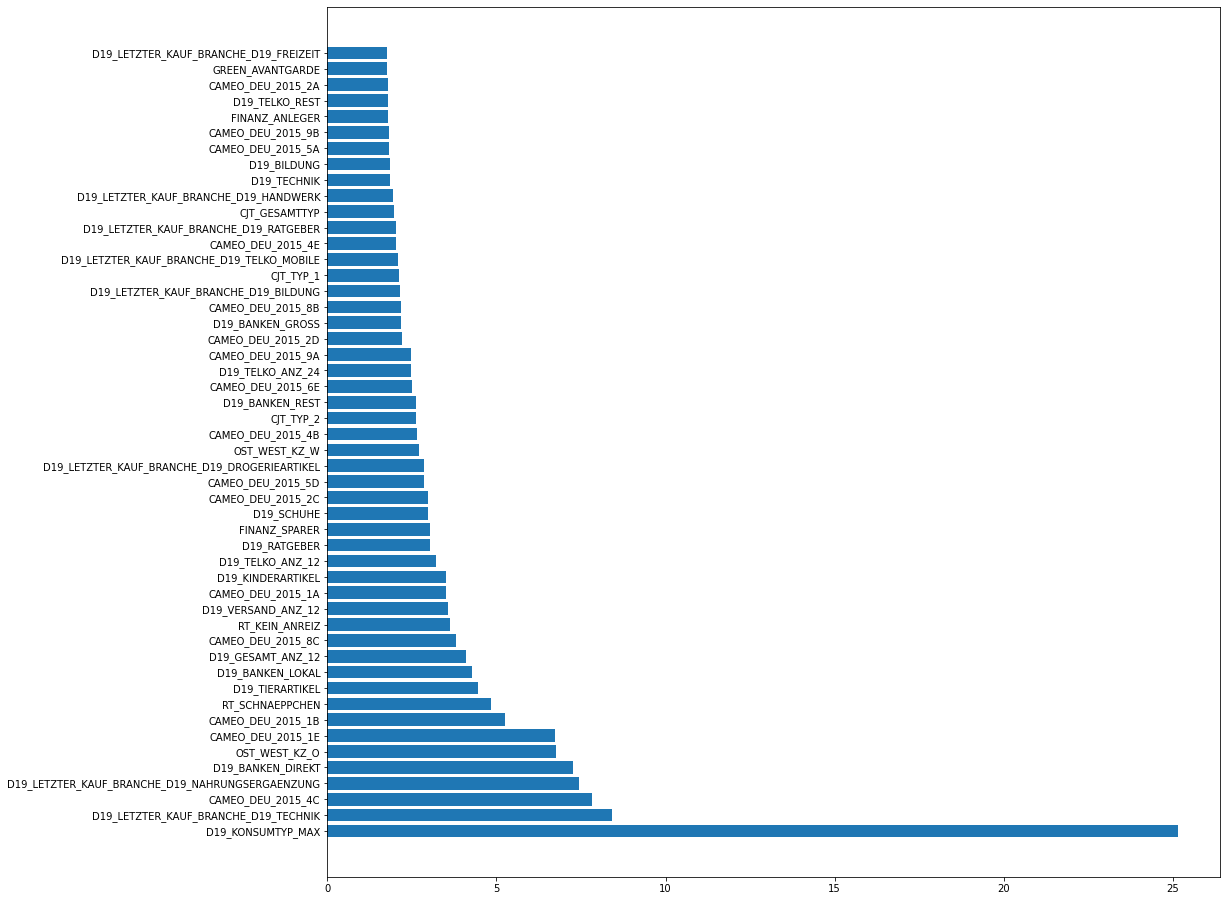

In [12]:
#######################################################################################################################
# Step 3 : Perform Feature Selection on the scaled data using a statistical method
#######################################################################################################################
selector = SelectKBest(chi2, k="all")  # start with all to visualize feature importances
importance_weights = selector.fit_transform(Xtrain, Ytrain)

feature_scores = selector.scores_
topN = np.argsort(feature_scores*-1)[0:50]  # multiply by -1 to sort descending

plt.figure(figsize=(16,16))
plt.barh(np.array(feature_columns)[topN], feature_scores[topN])


"""
There is no "right" answer for what is the best number of features to select. 
A good estimate of 50 can be gauged based on the barchart 
"""
top50 =  np.argsort(feature_scores*-1)[0:50]  # -1 multiplication to sort descending order
feature_selected_columns = np.array(feature_columns)[top50]
print(f"Dropped {len(feature_columns)-len(feature_selected_columns)} columns, left with {len(feature_selected_columns)} features")

(42962, 40) (42833, 40)


,component1,component2,component3,component4,component5,component6,component7,component8,component9,component10,...,component31,component32,component33,component34,component35,component36,component37,component38,component39,component40
0,-1.227235,-0.535039,-0.207585,-0.329875,0.331613,-0.044203,0.000522,-0.315153,-0.298563,-0.145047,...,0.792512,0.083452,-0.327838,0.041809,-0.018397,-0.017271,0.055128,-0.005483,-0.031743,0.003997
1,1.003797,-0.176693,-0.210427,0.563341,1.481934,0.010532,0.157231,0.292022,0.280775,0.194263,...,0.004863,-0.038510,-0.096814,-0.027659,0.034862,0.319607,0.213928,0.586479,0.607236,0.106881
2,-1.100756,-0.713700,0.981225,0.425008,-0.739965,0.712751,-0.438088,0.001454,-0.083683,-0.094030,...,0.025443,0.024869,0.076152,0.032586,-0.015634,-0.001809,-0.031624,-0.031576,0.019893,-0.001189
3,-1.087891,-1.055981,-0.315088,0.310337,-0.578760,0.320032,-0.494154,0.122066,-0.227204,0.061729,...,0.022732,0.010944,-0.016621,0.024395,-0.028334,-0.000324,0.002731,-0.009500,-0.001701,0.004472
4,-1.148789,-0.613098,-0.198405,-0.114587,-0.009616,-0.289602,0.525815,-0.373837,-0.442462,0.070886,...,-0.026352,0.002642,0.116824,0.013433,-0.023715,0.006601,-0.018319,-0.011834,0.006340,0.018335


Explained variance ratios: [0.5633148  0.09420566 0.04495839 0.03262069 0.02912015 0.02430839
 0.01754523 0.01550367 0.0137209  0.01220815 0.01090009 0.01035865
 0.00934007 0.00913042 0.00795108 0.00780987 0.00747868 0.00666989
 0.0065228  0.00621251 0.00589566 0.00537098 0.00431339 0.0042003
 0.00393858 0.0037102  0.00367184 0.00333229 0.00306648 0.00289202
 0.00265922 0.00232396 0.00221581 0.00199019 0.00190409 0.00184466
 0.00173299 0.00165894 0.0016371  0.00162624]


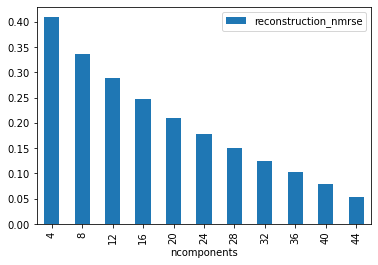

In [13]:
#######################################################################################################################
# Step 4 : Perform Dimensionality Reduction 
#######################################################################################################################
def normalized_rmse(x, z):
    """
    x is the true data
    z is the reconstructed/predicted data
    """    
    rmse = np.sqrt(mean_squared_error(x, z))
    nrmse = rmse/np.sqrt(np.mean(x**2))   # between [0, 1]
    return nrmse
    
    
components = [4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44]
pca_errors = []
for n_components in components:
    pca = PCA(n_components)
    pca_data = pca.fit_transform(Xtrain[feature_selected_columns])
    
    reconstructed = pca.inverse_transform(pca_data)
    nmrse = normalized_rmse(Xtrain[feature_selected_columns].values, reconstructed)
    pca_errors.append(nmrse)
    
reconstruction_errors = pd.DataFrame(list(zip(components, pca_errors)), columns=["ncomponents", "reconstruction_nmrse"])
reconstruction_errors.plot(x = "ncomponents", y = "reconstruction_nmrse", kind="bar")


"""
Based on the bar plot, if a 0.02 reconstruction error is deemed acceptable, than it looks like we need 40 
components to achieve dimensionality reduction without introducing too much noise.

The threshold used to determine number of components to use is based on heuristics. There are only approximately right
answers here.
"""

pca = PCA(n_components=40)
Xtrain_reduced = pca.fit_transform(Xtrain[feature_selected_columns])
Xtest_reduced = pca.transform(Xtest[feature_selected_columns])  # all transformations on train must be applied to test
print(Xtrain_reduced.shape, Xtest_reduced.shape)

# put it back together into a df 
colnames = ["component{}".format(n) for n in range(1, Xtrain_reduced.shape[1]+1)]
pca_train = pd.DataFrame(Xtrain_reduced, columns=colnames)
pca_test = pd.DataFrame(Xtest_reduced, columns=colnames)
display(pca_train.head())

print("Explained variance ratios: {}".format(pca.explained_variance_ratio_))

In [14]:
#######################################################################################################################
# Step 5 : Perform Classification or hyperparameter tuning then classification using gridsearchcv 
#######################################################################################################################
# define the grid

# use gridsearchcv to get best estimator

# train on full training dataset

# predict on test dataset using predict_proba method

# model = XGBClassifier(n_estimators = 100, max_depth=1, verbosity=1, random_state=42, n_jobs=-1)
# model = LogisticRegression(C=1, class_weight="balanced", n_jobs=-1, max_iter=200, verbose=1)


model = RandomForestClassifier(class_weight="balanced", max_depth=1, n_jobs=-1, verbose=1)
model.fit(Xtrain_reduced, Ytrain)

predictions = model.predict_proba(Xtest_reduced)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [15]:
#######################################################################################################################
# Step 6 : Save and submit to kaggle
#######################################################################################################################
results = pd.DataFrame({"LNR":testdata.LNR, "RESPONSE":predictions[:, 1]}).to_csv("{} rfcresults.csv".format(
    model.__class__.__name__), index=False)

In [16]:
model = LogisticRegression(C=1, class_weight="balanced", n_jobs=-1, max_iter=200, verbose=1)
model.fit(Xtrain_reduced, Ytrain)

predictions = model.predict_proba(Xtest_reduced)

results = pd.DataFrame({"LNR":testdata.LNR, "RESPONSE":predictions[:, 1]}).to_csv("{} logisticresults.csv".format(
    model.__class__.__name__), index=False)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.0s finished


In [17]:
model = XGBClassifier(n_estimators = 100, max_depth=1, verbosity=1, random_state=42, n_jobs=-1)
model.fit(Xtrain_reduced, Ytrain)

predictions = model.predict_proba(Xtest_reduced)
results = pd.DataFrame({"LNR":testdata.LNR, "RESPONSE":predictions[:, 1]}).to_csv("{} XGBresults.csv".format(
    model.__class__.__name__), index=False)

In [18]:
# use gridsearchcv to get best estimator for Logistic Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

parameters = {'C':[0.5, 1, 10, 100], 'class_weight':['balanced'], }
logreg=LogisticRegression()
clf = GridSearchCV(logreg, parameters,
                   n_jobs=-1, 
                   return_train_score=True, 
                   verbose=1, 
                   scoring=scoring_metrics,
                   refit='roc_auc',  
                  )
clf.fit(Xtrain_reduced, Ytrain)
clf.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.3s finished


LogisticRegression(C=0.5, class_weight='balanced')

In [19]:
model=clf.best_estimator_
model.fit(Xtrain_reduced, Ytrain)
predictions = model.predict_proba(Xtest_reduced)
results = pd.DataFrame({"LNR":testdata.LNR, "RESPONSE":predictions[:, 1]}).to_csv("{} GridLogresults.csv".format(
    model.__class__.__name__), index=False)


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(class_weight="balanced", random_state=42)
param_grid = { 
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4, 8, 12],
    'criterion' :['gini', 'entropy']
    }
CV_rfc = GridSearchCV(estimator=rfc, 
                      param_grid=param_grid, 
                      cv= 5,
                      n_jobs=-1,
                      verbose=1,
                      scoring=scoring_metrics, 
                      refit="roc_auc")
CV_rfc.fit(Xtrain_reduced, Ytrain)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   44.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 10.1min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 8, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200]},
             refit='roc_auc',
             scoring=['accuracy', 'f1', 'precision', 'recall', 'roc_auc'],
             verbose=1)

In [21]:
model = CV_rfc.best_estimator_
model.fit(Xtrain_reduced, Ytrain)
predictions = model.predict_proba(Xtest_reduced)
results = pd.DataFrame({"LNR":testdata.LNR, "RESPONSE":predictions[:, 1]}).to_csv("{} GridRandomForestresults.csv".format(
    model.__class__.__name__), index=False)

In [22]:
print (CV_rfc.best_estimator_)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, n_estimators=200, random_state=42)


In [24]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

XGB = XGBClassifier()
param_grid = {
    'n_estimators': [100, 200,50 ],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [10,20,5],
    'subsample': [0.7, 0.8, 0.9]
}

boost = GridSearchCV(XGB, 
                      param_grid=param_grid, 
                      cv= 5,
                      n_jobs=-1,
                      verbose=1,
                      scoring=scoring_metrics, 
                      refit="roc_auc")

boost.fit(Xtrain_reduced, Ytrain)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 13.2min finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [26]:
boost.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:
model = boost.best_estimator_
model.fit(Xtrain_reduced, Ytrain)
predictions = model.predict_proba(Xtest_reduced)
results = pd.DataFrame({"LNR":testdata.LNR, "RESPONSE":predictions[:, 1]}).to_csv("{} XGBBoostGridresults.csv".format(
    model.__class__.__name__), index=False)